In [9]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
img = cv2.imread(r"C:\CelebImageClassifier\Test_Images\image_5.jpeg")
img.shape

(800, 1200, 3)

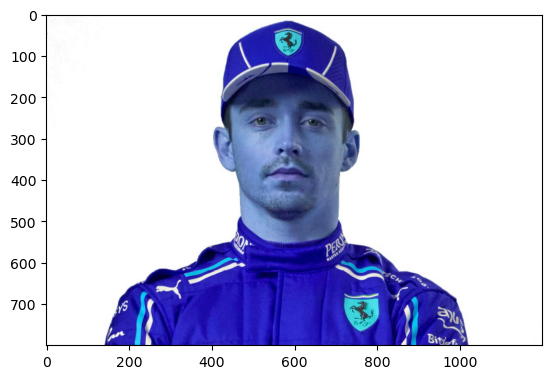

In [11]:
plt.imshow(img)
plt.show()

In [12]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(800, 1200)

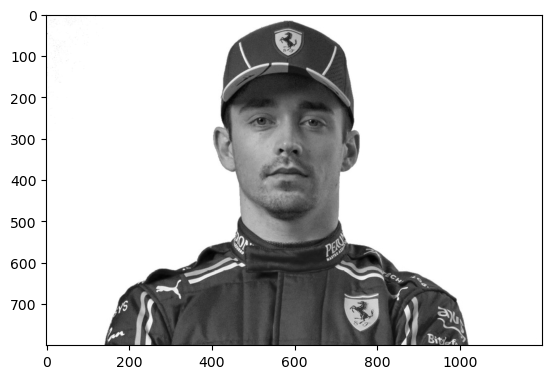

In [13]:
plt.imshow(gray_image,cmap = 'grey' )
plt.show()

In [14]:
face_cascade = cv2.CascadeClassifier(r"C:\CelebImageClassifier\OpenCV\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\CelebImageClassifier\OpenCV\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)
faces

array([[416, 136, 331, 331]])

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(416, 136, 331, 331)

In [16]:
face_image = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 10)


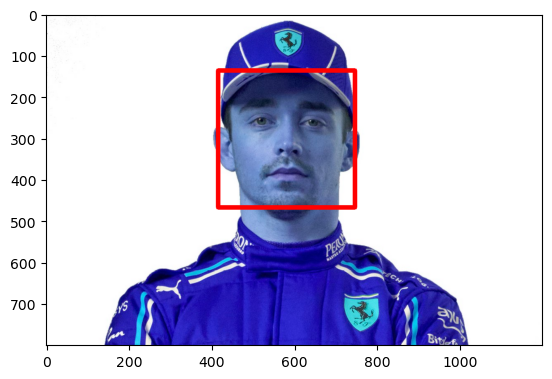

In [17]:
plt.imshow(face_image)
plt.show()

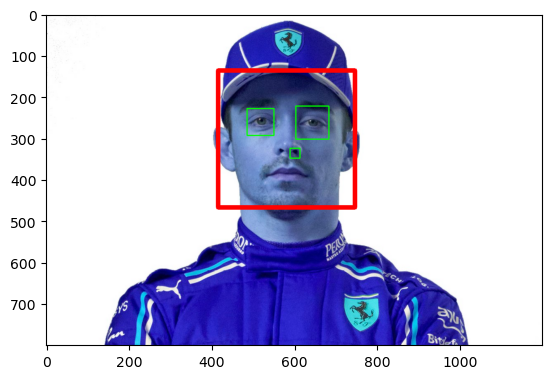

In [18]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

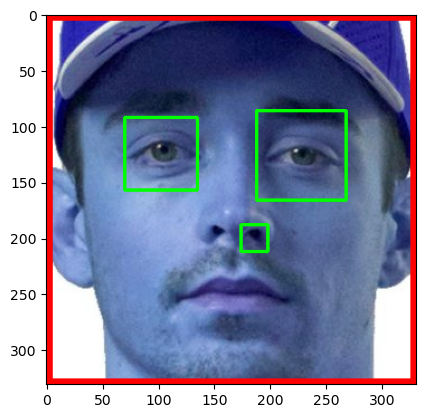

In [19]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [20]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

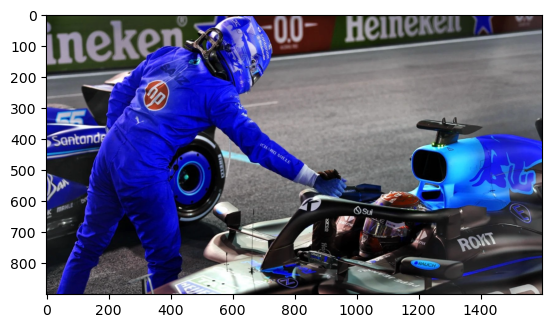

In [21]:
original_image = cv2.imread(r"C:\CelebImageClassifier\Test_Images\image_15.jpeg")
plt.imshow(original_image)
plt.show()

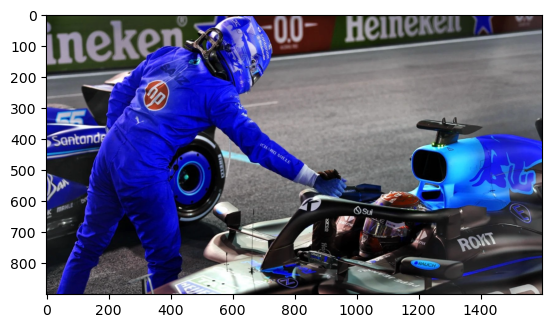

In [22]:
org_image_obstructed = cv2.imread(r"C:\CelebImageClassifier\Test_Images\image_15.jpeg")
plt.imshow(org_image_obstructed)
plt.show()

In [23]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r"C:\CelebImageClassifier\Test_Images\image_15.jpeg")
cropped_image_no_2_eyes

In [24]:
path_to_data = "C:\\CelebImageClassifier\\image_scrapper"

path_to_cr_data = "C:\\CelebImageClassifier\\image_scrapper\\cropped\\"



In [155]:
import numpy as np
import pywt
import cv2    
from matplotlib import pyplot as plt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

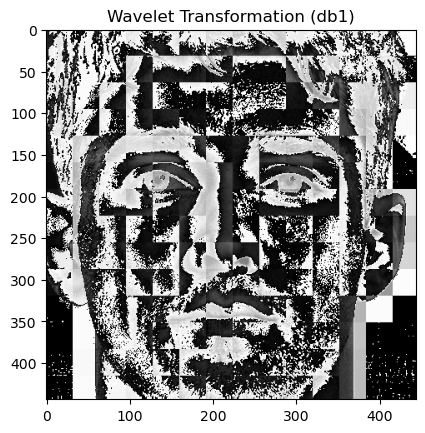

In [157]:
cropped_img = cv2.imread(r"C:\CelebImageClassifier\image_scrapper\cropped\Charles lecrec\Charles lecrec2.jpeg")  # Replace with your image path

# Check if the image is loaded properly
if cropped_img is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # Apply wavelet transformation (using 'db1' wavelet and level 5)
    im_har = w2d(cropped_img, 'db1', 5)

    plt.imshow(im_har, cmap='gray')
    plt.title("Wavelet Transformation (db1)")
    plt.show()

In [143]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [145]:
img_dirs

['C:\\CelebImageClassifier\\image_scrapper\\Alexandra daddrio',
 'C:\\CelebImageClassifier\\image_scrapper\\Charles lecrec',
 'C:\\CelebImageClassifier\\image_scrapper\\Lisa vicari',
 'C:\\CelebImageClassifier\\image_scrapper\\Max verstappen',
 'C:\\CelebImageClassifier\\image_scrapper\\Messi']

In [147]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [149]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpeg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Alexandra daddrio
Generating cropped images in folder:  C:\CelebImageClassifier\image_scrapper\cropped\Alexandra daddrio
Charles lecrec
Generating cropped images in folder:  C:\CelebImageClassifier\image_scrapper\cropped\Charles lecrec
Lisa vicari
Generating cropped images in folder:  C:\CelebImageClassifier\image_scrapper\cropped\Lisa vicari
Max verstappen
Generating cropped images in folder:  C:\CelebImageClassifier\image_scrapper\cropped\Max verstappen
Messi
Generating cropped images in folder:  C:\CelebImageClassifier\image_scrapper\cropped\Messi


In [151]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio': ['C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio1.jpeg',
  'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio10.jpeg',
  'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio11.jpeg',
  'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio12.jpeg',
  'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio13.jpeg',
  'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio14.jpeg',
  'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio15.jpeg',
  'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio16.jpeg',
  'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio\\Alexandra daddrio17.jpeg',
  'C:\\CelebImageClassifier\\

In [159]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio': 0,
 'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Charles lecrec': 1,
 'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Lisa vicari': 2,
 'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Max verstappen': 3,
 'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Messi': 4}

In [163]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [165]:
len(X[0])


4096

In [167]:
32*32*3 + 32*32

4096

In [169]:
X[0]

array([[20],
       [20],
       [26],
       ...,
       [ 0],
       [ 1],
       [ 0]], dtype=uint8)

In [171]:
y[0]

0

In [173]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(75, 4096)

In [175]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6842105263157895

In [179]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.80      0.67      0.73         6
           2       0.83      1.00      0.91         5
           3       1.00      0.25      0.40         4
           4       1.00      0.67      0.80         3

    accuracy                           0.68        19
   macro avg       0.77      0.72      0.63        19
weighted avg       0.85      0.68      0.70        19



In [181]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [183]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [187]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

,model,best_score,best_params
0,svm,0.733333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.533333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.696970,{'logisticregression__C': 1}


In [189]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [191]:
best_estimators['svm'].score(X_test,y_test)

0.7368421052631579

In [193]:
best_estimators['random_forest'].score(X_test,y_test)

0.47368421052631576

In [195]:

best_estimators['logistic_regression'].score(X_test,y_test)

0.7368421052631579

In [197]:
best_clf = best_estimators['svm']

In [199]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0, 0],
       [0, 6, 0, 0, 0],
       [1, 0, 4, 0, 0],
       [2, 1, 0, 1, 0],
       [0, 0, 1, 0, 2]], dtype=int64)

<Figure size 640x480 with 0 Axes>

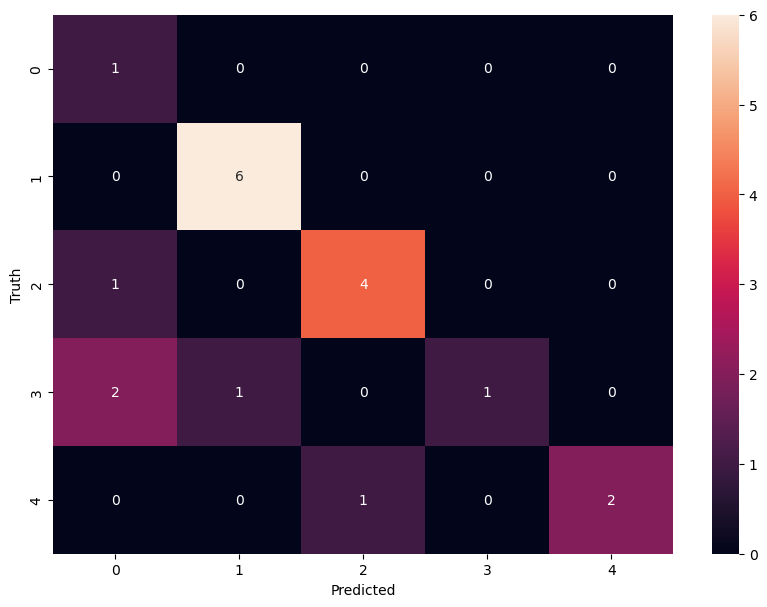

In [211]:
import seaborn as sn
# Clear the current figure
plt.clf()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [213]:
class_dict

{'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Alexandra daddrio': 0,
 'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Charles lecrec': 1,
 'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Lisa vicari': 2,
 'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Max verstappen': 3,
 'C:\\CelebImageClassifier\\image_scrapper\\cropped\\Messi': 4}

In [215]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [217]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))